# Exploración de los datos - Base obesidad

Para el desarrollo del proyecto, se realiza la exploración de los datos del dataset "Estimation of obseity level based on eating habits and physical condition" obtenida del repositorio UCI Machine Learning, mediante gráficos, información descriptiva y la aplicación de modelos no supervisados de clustering.

El conjunto de datos cuenta con las siguientes variables:

- **Genero**: Genero del individuo.
- **Age**: Edad del individuo.
- **Height**: Estatura del individuo.
- **Weight**: Peso del individuo.
- **family_history_with_overweight**: historial del sobrepeso en la familia del individuo.
- **FAVC**: ¿Come frecuentemente comidas con altas calorías? 
- **FCVC**: ¿Come frecuentemente vegetales con altas calorías? 
- **NCP**: ¿Cuántas comidas principales come a diario?
- **CAEC**: ¿Come algo entre comidas principales?
- **SMOKE**: ¿Usted fuma? 
- **CH2O**: ¿Cuánta agua consume diaríamente?
- **SCC**: ¿Usted moniteorea el número de calorías que ingiere en cada comida?
- **FAF**: ¿Cada cuánto realiza actividad física? 
- **TUE**: ¿Qué tan frecuente usa dispositivos electrónicos como celulares, tablets, videojuegos, televisiores, computadores u otros?
- **CALC**: ¿Cada cuánto consume alcohol?
- **MTRANS**: ¿Qué medio de transporte utiliza usualmente?
- **NObeseydad**: Nivel de obesidad del individuo.

Primero se cargan las librerías iniciales y el conjunto de datos

In [1]:
# Cargue de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
import prince

datos = pd.read_csv("../Datos/ObesityDataSet_raw_and_data_sinthetic.csv")
datos.dtypes


C:\Users\CARLOS MARIO\AppData\Local\Temp\ipykernel_8580\3454879028.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Con el fin de realizar esta primera descriptiva, se toman únicamente las variables cuantitativas del dataset, junto con la variable 'NObeyesdad' la cual define los niveles de obesidad. Antes de esto nos aseguramos que no se cuenten con datos faltantes en el dataset

In [2]:
datos.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Llama la atención contar con valores decimales en los cuartiles para variables como: Edad, número de comidas al día, etc. Se valida con los siguientes histogramas:

In [10]:
datos.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


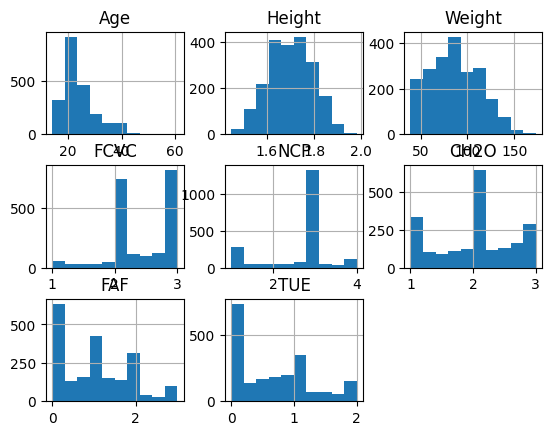

<Figure size 2000x1600 with 0 Axes>

In [9]:
datos.drop(['NObeyesdad'],axis=1).hist()
plt.figure(figsize=(20,16))
plt.show()

Como se observa, para las variables: Edad, FCVC, NCP, CH2O, FAF y TUE, no tiene sentido tener valores decimales pese a no contar con unidades de medida desde el repositorio de información. Por esta razón se opta por redondear estas cifras.

In [2]:
datos['Age'] = round(datos['Age'] )
datos['FCVC'] = round(datos['FCVC'] )
datos['NCP'] = round(datos['NCP'] )
datos['CH2O'] = round(datos['CH2O'] )
datos['FAF'] = round(datos['FAF'] )
datos['TUE'] = round(datos['TUE'] )
datos.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586058,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,0.093305,26.191172,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.473343,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


En primera instancia, se busca definir qué tanta influencia tienen las variables Peso y Estatura sobre el nivel de obesidad del conjunto de datos. A priori se observa una notoria influencia de la variable peso en el agrupamiento de los datos.

In [3]:
numerical_columns = datos[["Age","Weight","Height", "FCVC", "NCP", "CH2O", "FAF","TUE","NObeyesdad"]]
numerical_columns.describe()

,Age,Weight,Height,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,86.586058,1.701677,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,26.191172,0.093305,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,39.000000,1.450000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,65.473343,1.630000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,83.000000,1.700499,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,107.430682,1.768464,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,173.000000,1.980000,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: xlabel='Weight', ylabel='Height'>

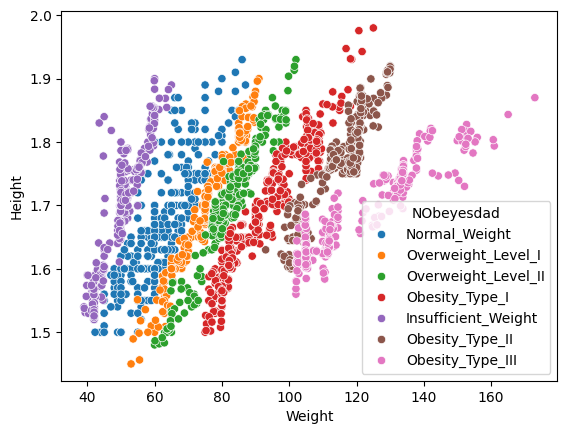

In [13]:
sns.scatterplot(data=numerical_columns,x='Weight',y='Height',hue='NObeyesdad')

Es notorio que los niveles más altos de obesidad estan determinados por un mayor peso, si bien la altura parece no tener una tendencia marcada, se sabe que el índice de masa corporal (IMC) es determinado por estas dos variables por lo que puede tener una influencia clara en los casos de obesidad, para validar el supuesto se crea la variable IMC. Adicionalmente, se transforma la variable 'NObeyesdad' en variable numérica, asignando los siguientes valores:

- obesidad 0: Peso insuficiente.
- obesidad 1: Peso normal.
- obesidad 2: Nivel de sobrepeso I.
- obesidad 3: Nivel de sobrepeso II.
- obesidad 4: Nivel de obesidad I.
- obesidad 5: Nivel de obesidad II.
- obesidad 6: Nivel de obesidad III.

In [4]:
numerical_columns['IMC']=numerical_columns['Weight']/(numerical_columns['Height']**2)
numerical_columns['obesidad']= numerical_columns['NObeyesdad'].map({'Normal_Weight': 1, 'Insufficient_Weight': 0, 'Overweight_Level_I':2,'Overweight_Level_II':3, 'Obesity_Type_I':4,'Obesity_Type_II':5, 'Obesity_Type_III':6})
numerical_columns=numerical_columns.drop('NObeyesdad',axis=1)
numerical_columns.head()

C:\Users\CARLOS MARIO\AppData\Local\Temp\ipykernel_8580\3611866052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns['IMC']=numerical_columns['Weight']/(numerical_columns['Height']**2)
C:\Users\CARLOS MARIO\AppData\Local\Temp\ipykernel_8580\3611866052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_columns['obesidad']= numerical_columns['NObeyesdad'].map({'Normal_Weight': 1, 'Insufficient_Weight': 0, 'Overweight_Level_I':2,'Overweight_Level_II':3, 'Obesity_Type_I':4,'Obesit

,Age,Weight,Height,FCVC,NCP,CH2O,FAF,TUE,IMC,obesidad
0,21.0,64.0,1.62,2.0,3.0,2.0,0.0,1.0,24.386526,1
1,21.0,56.0,1.52,3.0,3.0,3.0,3.0,0.0,24.238227,1
2,23.0,77.0,1.80,2.0,3.0,2.0,2.0,1.0,23.765432,1
3,27.0,87.0,1.80,3.0,3.0,2.0,2.0,0.0,26.851852,2
4,22.0,89.8,1.78,2.0,1.0,2.0,0.0,0.0,28.342381,3


In [15]:
numerical_columns.corr()

,Age,Weight,Height,FCVC,NCP,CH2O,FAF,TUE,IMC,obesidad
Age,1.000000,0.203452,-0.026184,0.005941,-0.043440,-0.024554,-0.133161,-0.286071,0.245281,0.284082
Weight,0.203452,1.000000,0.463136,0.178952,0.103273,0.186316,-0.047948,-0.039376,0.934806,0.913251
Height,-0.026184,0.463136,1.000000,-0.053772,0.244055,0.180895,0.290594,0.058097,0.131785,0.133565
FCVC,0.005941,0.178952,-0.053772,1.000000,0.011111,0.061140,0.013661,-0.077269,0.228128,0.195705
NCP,-0.043440,0.103273,0.244055,0.011111,1.000000,0.063477,0.130322,0.013010,0.033817,0.020931
CH2O,-0.024554,0.186316,0.180895,0.061140,0.063477,1.000000,0.118205,-0.029207,0.143465,0.138171
FAF,-0.133161,-0.047948,0.290594,0.013661,0.130322,0.118205,1.000000,0.055513,-0.171851,-0.197186
TUE,-0.286071,-0.039376,0.058097,-0.077269,0.013010,-0.029207,0.055513,1.000000,-0.068898,-0.079528
IMC,0.245281,0.934806,0.131785,0.228128,0.033817,0.143465,-0.171851,-0.068898,1.000000,0.977826
obesidad,0.284082,0.913251,0.133565,0.195705,0.020931,0.138171,-0.197186,-0.079528,0.977826,1.000000


Se aprecia que la correlación más alta con la variable 'obesidad' la tienen las variables: Peso e IMC, esta última, como se mencionó, depende del peso y la estatura. Graficamente se puede ver en el siguiente gráfica. 

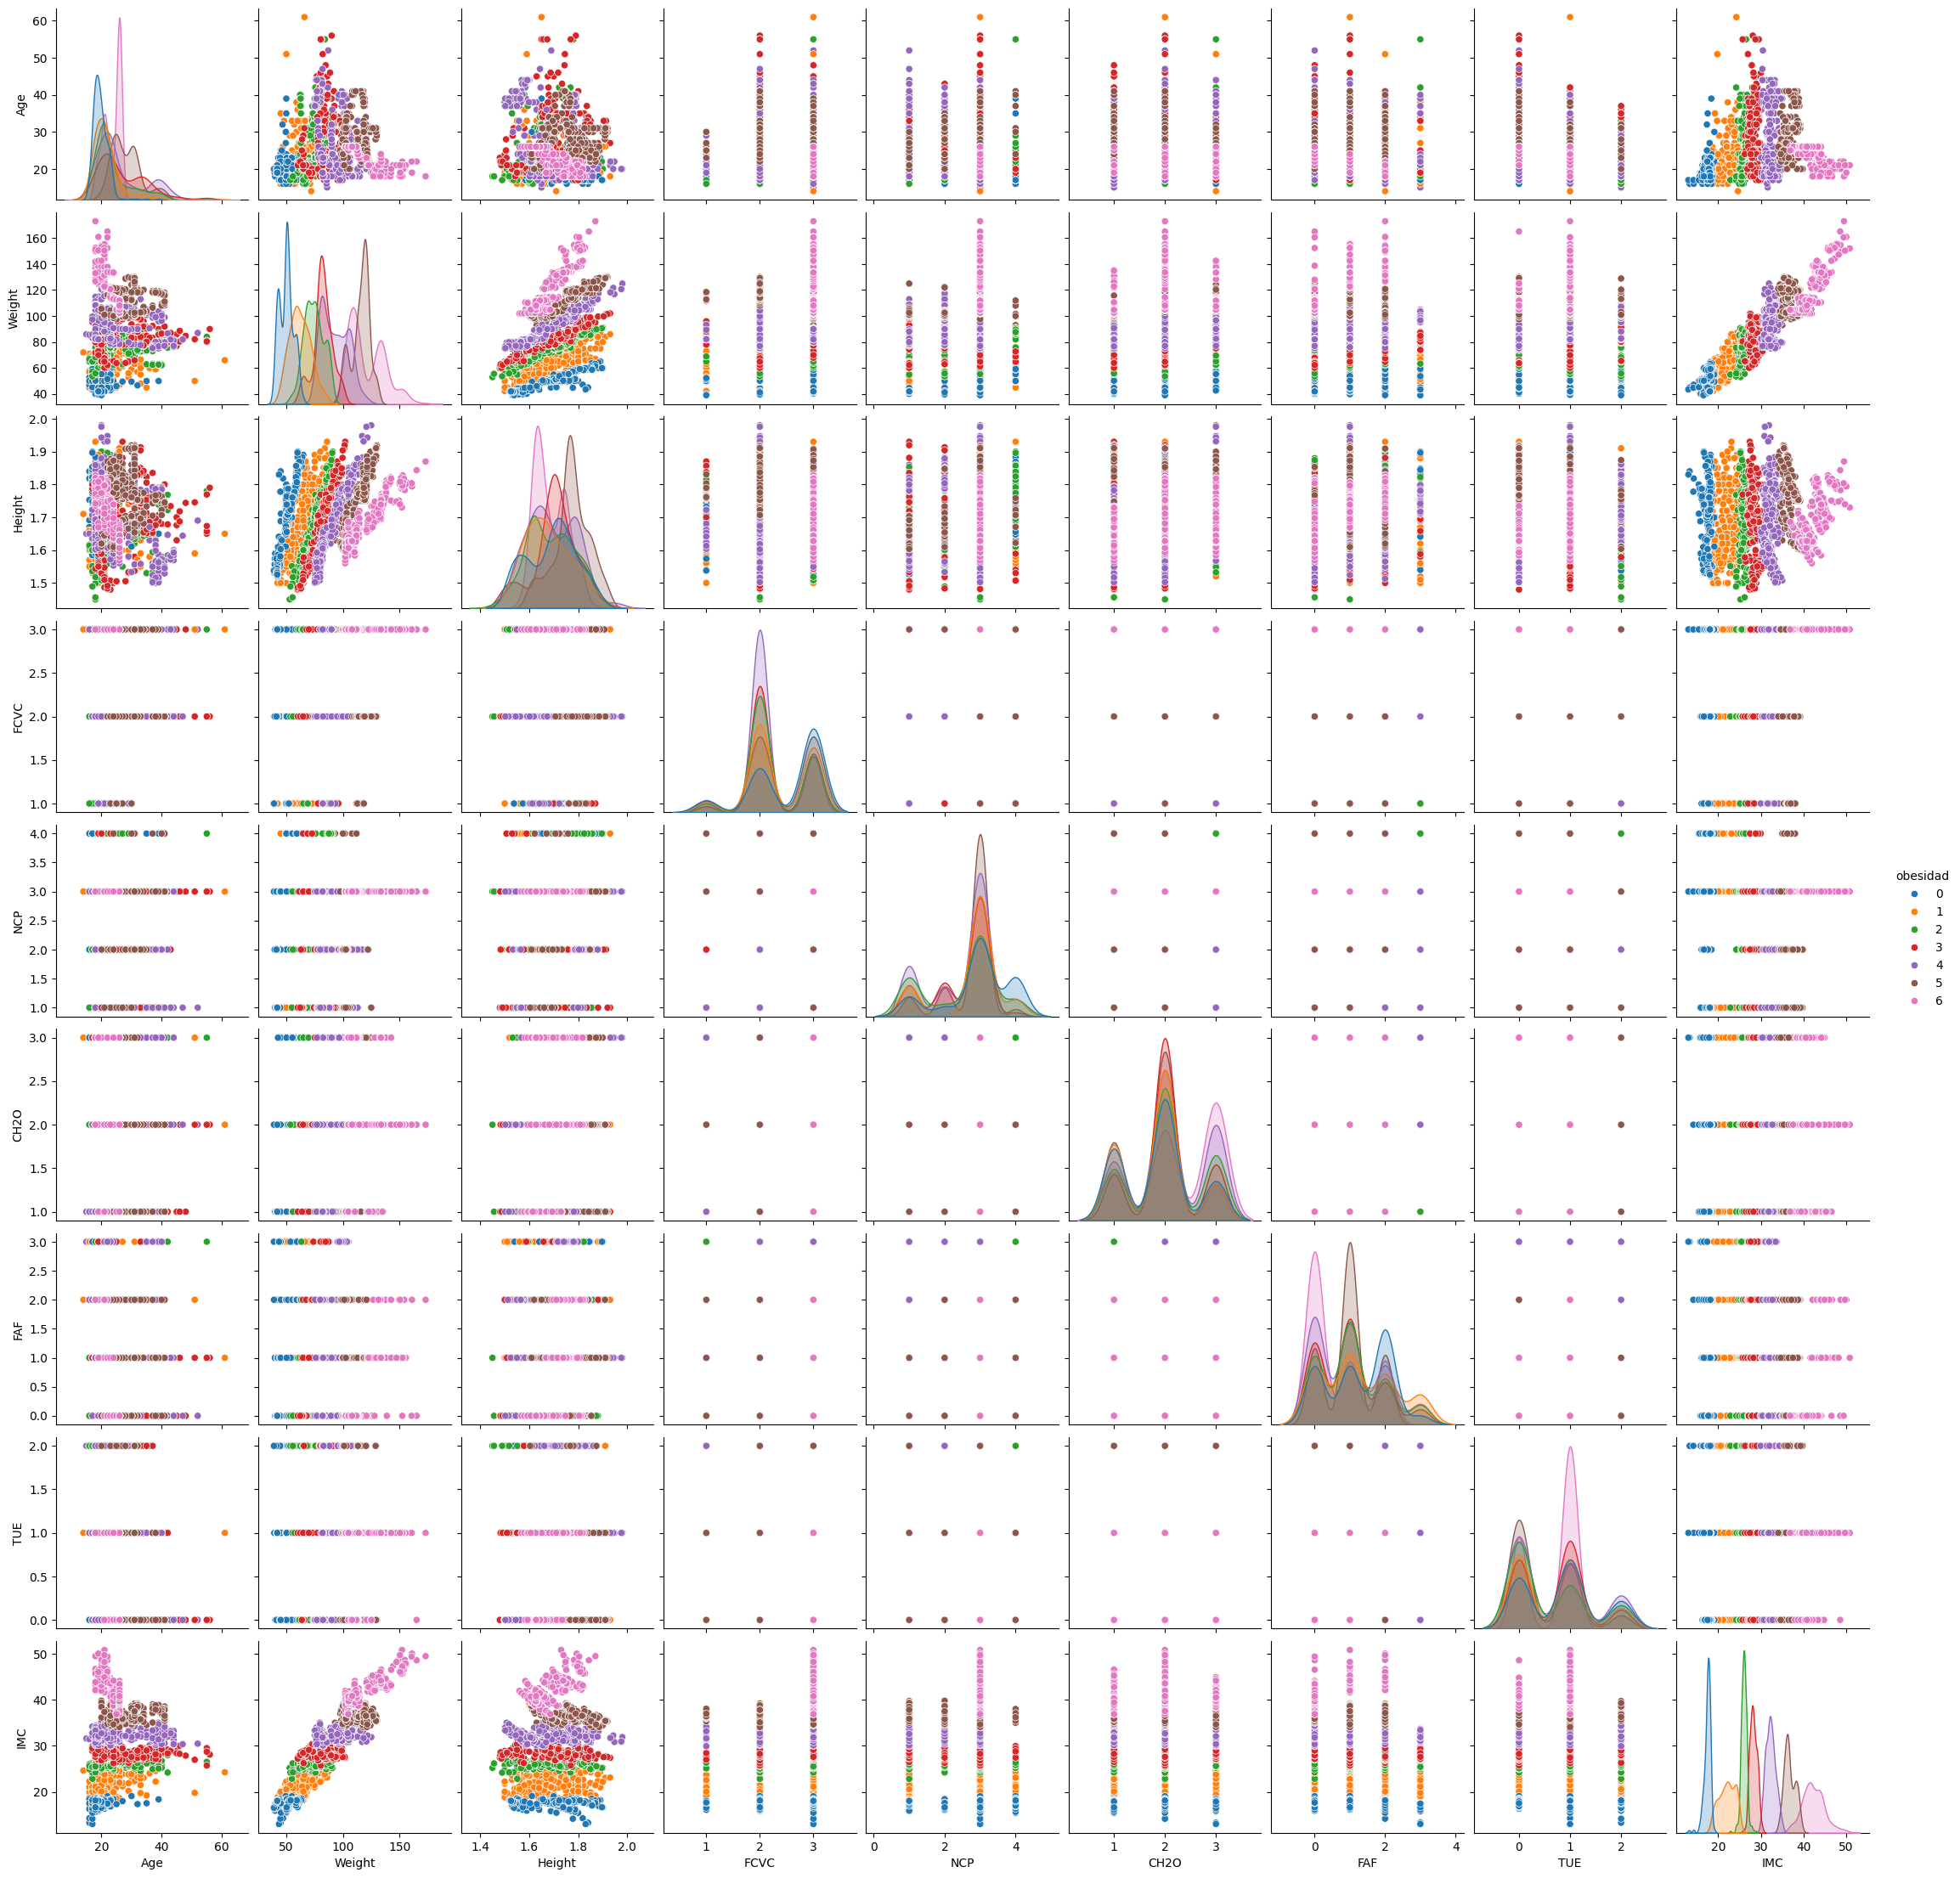

In [16]:
graphs=sns.pairplot(numerical_columns, hue='obesidad',diag_kind="kde", palette="tab10") 
graphs

Tal como se esperaba, la correlación más alta de la variable obesidad se encuentra con las variables IMC y Peso, si bien la correlación con la variable altura es débil, su influencia en el IMC hace que los modelos a plantear puedan estar sesgados por estas variables, por esta razón se opta por excluirlas dentro del conjunto de datos.

Adicionalmente, se observa que para las demás variables no se muestran patrones evidentes, se cuenta con mayor variabilidad en la información respecto a la variable objetivo de obesidad. 

In [5]:
numerical_columns= numerical_columns.drop('Weight', axis=1)
numerical_columns= numerical_columns.drop('Height', axis=1)
numerical_columns= numerical_columns.drop('IMC', axis=1)

Eliminadas las variables Peso, Altura IMC, se observan nuevamente las correlaciones del conjunto de datos

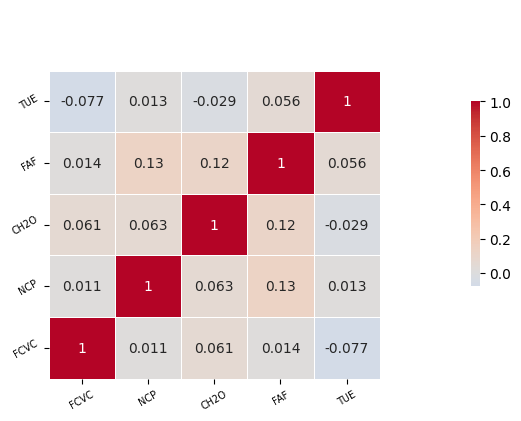

In [18]:
fig, ax = plt.subplots()
s=sns.heatmap(pd.DataFrame(data=numerical_columns[numerical_columns.columns[1:-1]]).corr(),cmap='coolwarm', center=0,
             linewidths=.5, cbar_kws={"shrink": .5},annot=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,6)
ax.set_ylim(0,6)
plt.show()

# Clustering

Se quiere observar que caracterísiticas se pueden encontrar en el conjunto de datos utilizando unicamente las variables cuantitativas y excluyendo Peso y Estatura del data set. Para este ejercicio inicialmente se genera el dendograma jerárquico sobre el conjunto de datos.

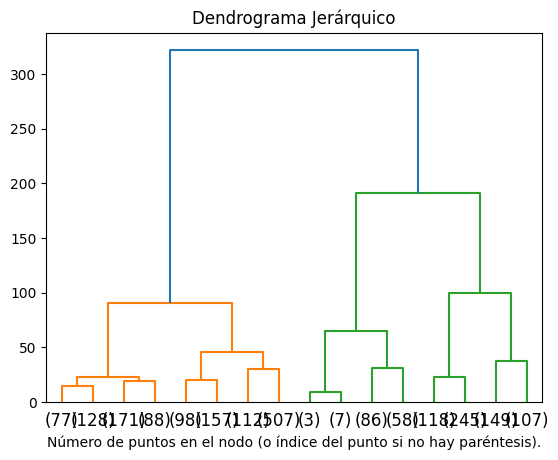

In [7]:
X= numerical_columns.drop('obesidad',axis=1)
#X=numerical_columns
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)

def plot_dendrogram(model, **kwargs):
    # Crear el conteo de muestras bajo cada nodo
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # es una hoja
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Trazar el dendrograma correspondiente
    dendrogram(linkage_matrix, **kwargs)

# Trazar el dendrograma
plt.title('Dendrograma Jerárquico')
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Número de puntos en el nodo (o índice del punto si no hay paréntesis).")
plt.show()

Se puede identificar una separación marcada en dos grupos realizando un corte por debajo de 150, esto puede indicar que la distancia intracluster no sea alta pero si marcada. También se aprecia que en la agrupación de los puntos tuenda a haber cierta tendencia, encontrando el mayo conjunto de datos en el último clúster, donde 313 y 474 individuos parecen tener ciertas características similares, así mismo hay grupos donde apenas 7 y 3 individuos son agrupados por sus condiciones similares, si bien llama la atención el bajo número de registros, no son considerados como atípicos puesto que agrupados presentan similitud con el grupo naranja definido por el dendograma.



In [8]:
X= numerical_columns.drop('obesidad',axis=1)
Y=numerical_columns[["obesidad"]]
X.head()

,Age,FCVC,NCP,CH2O,FAF,TUE
0,21.0,2.0,3.0,2.0,0.0,1.0
1,21.0,3.0,3.0,3.0,3.0,0.0
2,23.0,2.0,3.0,2.0,2.0,1.0
3,27.0,3.0,3.0,2.0,2.0,0.0
4,22.0,2.0,1.0,2.0,0.0,0.0


## K-means 

Ahora se aplica el método de clustering de K-Means sobre el conjunto de datos cuantitativo. Primero se determina el número de clusters óptimo por el métodp de k means mediante la curva de Elbow.

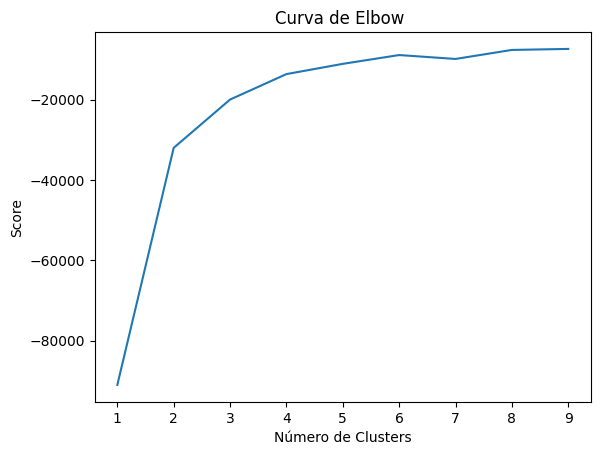

In [9]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Curva de Elbow ')
plt.show()

Se puede apreciar que la curva se empieza a suavizar desde el punto 4, por tal razón se escogen 4 clústers como el número óptimo de grupos a considerar bajo este método. 

Antes de graficar, se observan los centroides de cada grupo

In [26]:
kmeans_model = KMeans(n_clusters=4, random_state=30).fit(X)
centroids = kmeans_model.cluster_centers_
print(centroids)

[[31.65660377  2.38867925  2.61886792  1.81886792  0.98490566  0.4754717 ]
 [19.6777669   2.40548482  2.70225269  1.99412341  1.21351616  0.79431929]
 [24.74366617  2.48882265  2.71087928  2.14307004  0.73472429  0.65126677]
 [40.57142857  2.31818182  2.61038961  1.92857143  0.85714286  0.18831169]]


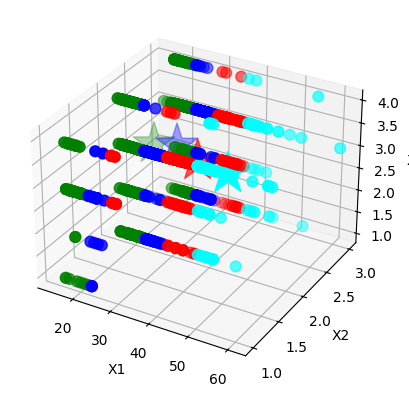

In [35]:
# Predicting the clusters
labels = kmeans_model.predict(X)

# Getting the cluster centers
C = kmeans_model.cluster_centers_

colores=['red','green','blue','cyan']

# Asignar colores a cada punto según su cluster
asignar = [colores[label] for label in labels]

# Graficar los puntos y los centroides
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:,1], X.iloc[:,2], c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

Se evidencia en el grafico 3D la buena separación de las 4 clusters entre si. Cabe señalar que en este grafico se muestran los ejes X1: Edad, X2: FCVC y X3: NCP.

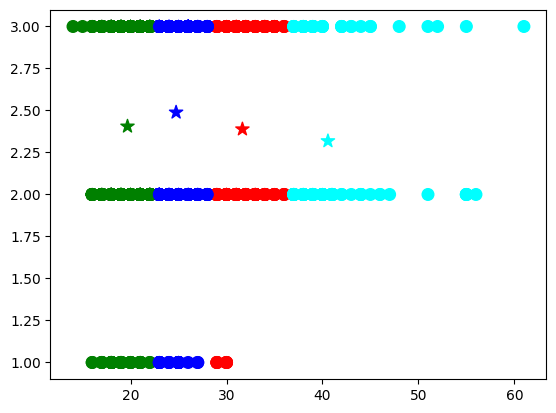

In [55]:
# Getting the values and plotting it

#fig, axs=plt.subplots(2,3)
f1 = numerical_columns['Age'].values
f2 = numerical_columns['FCVC'].values
f3 = numerical_columns['NCP'].values
f4 = numerical_columns['CH2O'].values
f4 = numerical_columns['FAF'].values
f5 = numerical_columns['TUE'].values

 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=100)
plt.show()

In [60]:
copy =  pd.DataFrame()
copy['TUE']=numerical_columns['TUE'].values
copy['obesidad']=numerical_columns['obesidad'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,265
1,green,1021
2,blue,671
3,cyan,154


Se aprecia que de los 4 clusters generados mediante kmeans, dos recogen más de la mitad de los individuos de la población, teniendo el grupo azul una mayor aglomeración de individuos con características similares. Así mismo, los grupos rojos y cyan aglomeran un menos número de individuos.

# K means y reducción de dimensionalidad

Con el fin de ver la variabilidad que se puede explicar con el conjunto de datos, se realiza el método de reducción de descomposición por componentes principales (ACP). Para ello, primero se estima hasta un máximo de 6 componentes con el fin de observar la variabilidad que explica cada componente:

In [64]:
# Reducir la dimensión utilizando PCA

pca = prince.PCA(
     n_components=6,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
 )

acp = pca.fit(X)
acp.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,1.376,22.93%,22.93%
1,1.189,19.81%,42.74%
2,0.983,16.39%,59.13%
3,0.918,15.31%,74.43%
4,0.838,13.97%,88.40%
5,0.696,11.60%,100.00%


Se puede observar que con solo dos componentes principales se explica el 43.76% mientras que con 3 componentes se obtiene una explicación de la variabilidad del  
conjunto de datos de un 59.56%. Se opta por tomar 3 componentes principales con el fin de reducir el conjunto de datos a la mitad.

In [65]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X) 

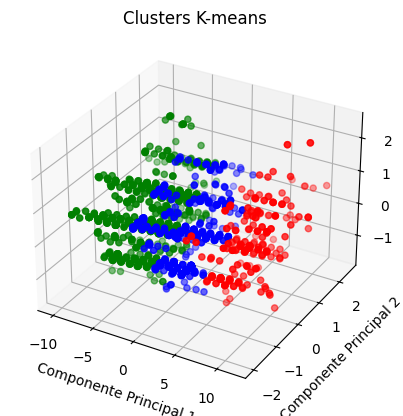

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
labels=kmeans_model.labels_
colors = ['r', 'g', 'b']  # Colores para cada cluster

for label, color in zip(range(len(np.unique(labels))), colors):
    ax.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], X_pca[labels == label, 2], color=color)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Clusters K-means')

plt.show()

Como se observa en la gráfica, la agrupación del K means tomando 3 componentes principales. Los grupos presentan un comportamiento similar al observado en el modelo sin acp.